In [177]:
# Simulation result
x<-as.matrix(read.table("2.3_geno.txt"))
pheno<-as.numeric(unlist(read.table("2.3_pheno.txt")))
tbvp<-as.numeric(unlist(read.table("2.3_tbvp.txt")))

In [178]:
##load packages
library(doParallel)
library(foreach)
cl<-makeCluster(8) 
repeats <- 10
n.fold <- 5 
acc<-list()
library(rrBLUP)
packageVersion("rrBLUP") 

[1] '4.6'

In [179]:
#function for calculating the accuracy of GP with varying size of reference population
A <- A.mat(x, n.core=8)
row.names(A)=1:3000;colnames(A)=1:3000
data <- data.frame(tbcw=pheno,tbvp=tbvp,gid=1:3000) 
n.sample<-500
set.seed(100)
id<-sample(1:dim(x)[1],n.sample) 
bcw_test <- data
bcw_test$tbcw[-id] <- NA
res <- kin.blup(bcw_test, K=A, geno="gid", pheno="tbcw")

In [180]:
cor(data$tbcw[id],data$tbvp[id])
cor(res$pred[id],data$tbvp[id])
cor(data$tbcw[id],res$pred[id])
cor(data$tbcw[-id],res$pred[-id])

[1] 0.8023384

[1] 0.856314

[1] 0.9215468

[1] 0.5865669

In [181]:
n.sample<-1000
set.seed(100)
id2<-sample(1:dim(x)[1],n.sample) 
bcw_test <- data
bcw_test$tbcw[-id2] <- NA
res2 <- kin.blup(bcw_test, K=A, geno="gid", pheno="tbcw")

In [182]:
cor(data$tbcw[id2],data$tbvp[id2])
cor(res2$pred[id2],data$tbvp[id2])
cor(data$tbcw[id2],res2$pred[id2])
cor(data$tbcw[-id2],res2$pred[-id2])

[1] 0.7853594

[1] 0.8531984

[1] 0.8725218

[1] 0.6214491

In [183]:
library("ggplot2")

In [184]:
m1<-data.frame(x=data$tbcw[id],y=data$tbvp[id],pred=res$pred[id])
m2<-data.frame(x=data$tbcw[id2],y=data$tbvp[id2],pred=res2$pred[id2])

In [188]:
r500<-ggplot(m1, aes(x=x, y=y)) + 
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "Phenotypes",y="TBV")+
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()

r1000<-ggplot(m2, aes(x=x, y=y)) +
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "Phenotypes",y="TBV")+
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()


In [189]:
a<-ggplot(m1, aes(x=pred, y=y)) + 
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "GEBV",y="TBV")+
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()


b<-ggplot(m2, aes(x=pred, y=y)) +
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "GEBV",y="TBV")+
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()



In [166]:
png("r500.png",width=8, height=8, units="in", res=300)
r500
dev.off()
png("r1000.png",width=8, height=8, units="in", res=300)
r1000
dev.off()

png 
  2

png 
  2

In [196]:
# Simulation result
x<-as.matrix(read.table("lowh2_geno.txt"))
pheno<-as.numeric(unlist(read.table("lowh2_pheno.txt")))
tbvp<-as.numeric(unlist(read.table("lowh2_tbvp.txt")))

In [197]:
#function for calculating the accuracy of GP with varying size of reference population
A <- A.mat(x, n.core=8)
row.names(A)=1:3000;colnames(A)=1:3000
data <- data.frame(tbcw=pheno,tbvp=tbvp,gid=1:3000) 
n.sample<-500
set.seed(100)
id<-sample(1:dim(x)[1],n.sample) 
bcw_test <- data
bcw_test$tbcw[-id] <- NA
res <- kin.blup(bcw_test, K=A, geno="gid", pheno="tbcw")

In [198]:
cor(data$tbcw[id],data$tbvp[id])
cor(res$pred[id],data$tbvp[id])
cor(data$tbcw[id],res$pred[id])
cor(data$tbcw[-id],res$pred[-id])

[1] 0.5726345

[1] 0.773204

[1] 0.7492811

[1] 0.3730361

In [199]:
n.sample<-1000
set.seed(100)
id2<-sample(1:dim(x)[1],n.sample) 
bcw_test <- data
bcw_test$tbcw[-id2] <- NA
res2 <- kin.blup(bcw_test, K=A, geno="gid", pheno="tbcw")

In [200]:
cor(data$tbcw[id2],data$tbvp[id2])
cor(res2$pred[id2],data$tbvp[id2])
cor(data$tbcw[id2],res2$pred[id2])
cor(data$tbcw[-id2],res2$pred[-id2])

[1] 0.5672249

[1] 0.7618656

[1] 0.7773853

[1] 0.3700717

In [201]:
m3<-data.frame(x=data$tbcw[id],y=data$tbvp[id],pred=res$pred[id])
m4<-data.frame(x=data$tbcw[id2],y=data$tbvp[id2],pred=res2$pred[id2])

In [202]:
r500_0.3<-ggplot(m3, aes(x=x, y=y)) + 
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "Phenotypes",y="TBV")+
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()

r1000_0.3<-ggplot(m4, aes(x=x, y=y)) +
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "Phenotypes",y="TBV")+   
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()

In [203]:
c<-ggplot(m3, aes(x=pred, y=y)) + 
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "GEBV",y="TBV")+
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()

d<-ggplot(m4, aes(x=pred, y=y)) +
      geom_point(shape=20)+
      geom_smooth(method=lm,se=FALSE,color="red")+
      labs(x = "GEBV",y="TBV")+
      xlim(-10,60)+
      ylim(0,50)+
      stat_cor()


Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing non-finite values (stat_cor)."Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2 rows containing non-finite values (stat_cor)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

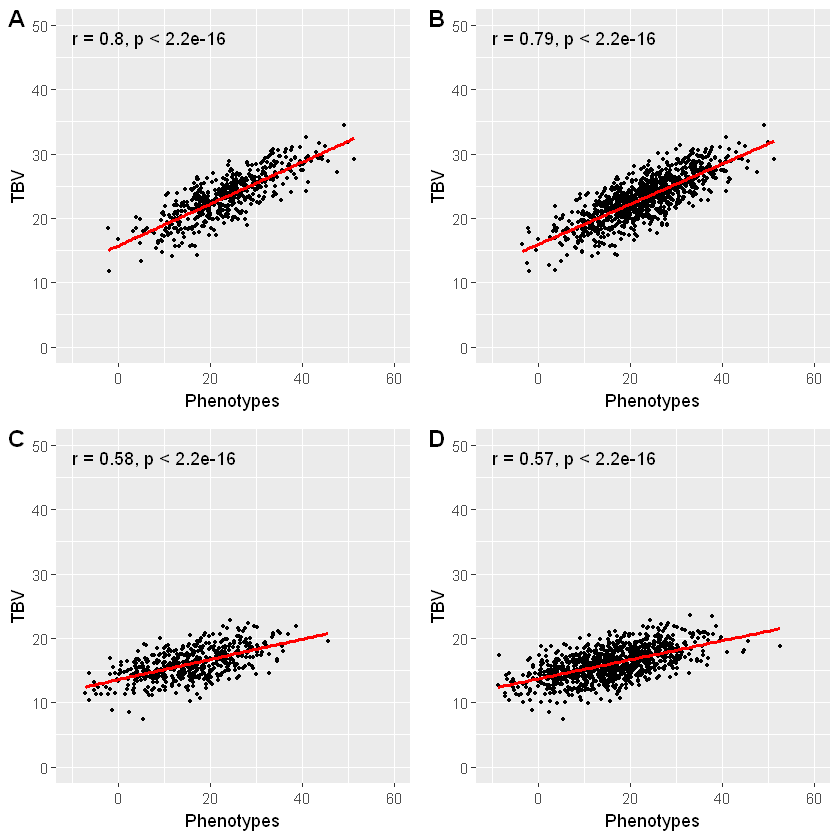

In [204]:
library("ggpubr")
ggarrange(r500,r1000, r500_0.3,r1000_0.3, 
          labels = c("A","B","C","D"),
          ncol = 2, nrow = 2)

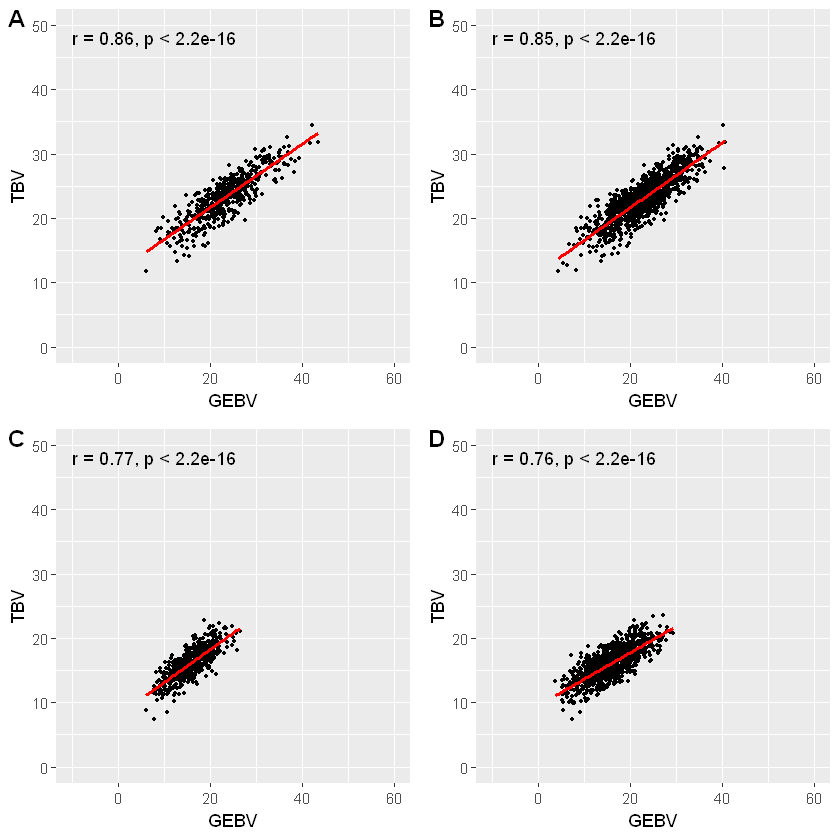

In [205]:
ggarrange(a,b,c,d,
          labels = c("A","B","C","D"),
          ncol = 2, nrow = 2)